In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pickle
import json

In [2]:
data_set = pickle.load(open('mushroom.p', 'rb'))
para = json.loads(open('para.json', 'r').read())

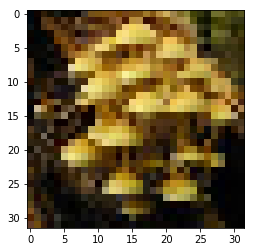

In [3]:
%matplotlib inline
plt.imshow(data_set['train_image'][1001]/255)

In [4]:
import tensorflow as tf

_, w, h, c = data_set['train_image'].shape
num_of_class = len(np.unique(data_set['train_label'])) # train_label에 등장하는 class의 개수로 전체 클래스의 개수를 추정
log = {
    'loss' : [],
    'training_accuracy' : [],
    'test_accuracy' : []
}

l_rate = para['learning_rate']
num_of_iteration = para['num_of_iteration']
print_frequency = para['print_frequency']

train_x = np.reshape(data_set['train_image'], (-1, w * h * c))
test_x = np.reshape(data_set['test_image'], (-1, w * h * c))
train_y = np.reshape(data_set['train_label'], (-1, 1))
test_y = np.reshape(data_set['test_label'], (-1, 1))

X = tf.placeholder(tf.float32, [None, w * h * c])
Y = tf.placeholder(tf.int32, [None, 1])
Y_one_hot = tf.one_hot(Y, num_of_class)
Y_one_hot = tf.reshape(Y_one_hot, [-1, num_of_class])

W = tf.Variable(tf.random_normal([w * h * c, num_of_class]), name='w')
b = tf.Variable(tf.random_normal([num_of_class]), name='b')

logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=l_rate).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(num_of_iteration):
        _, loss, train_acc = sess.run([optimizer, cost, accuracy], feed_dict={X: train_x, Y: train_y})
        pred = sess.run(prediction, feed_dict={X: test_x})
        result = []
        for p, y in zip(pred, test_y.flatten()):
            result.append(p == int(y))
            
        test_acc = sum(result) / len(result)
        
        log['loss'].append(loss)
        log['training_accuracy'].append(train_acc)
        log['test_accuracy'].append(test_acc)

        if step % print_frequency == 0:
            print("Step: {:5}\tLoss: {:.3f}\ttrain_acc: {:.2%}\ttest_acc: {:.2%}".format(step, loss, train_acc, test_acc))        

Step:     0	Loss: 5909.888	train_acc: 50.20%	test_acc: 50.00%
Step:   100	Loss: 1339.691	train_acc: 54.85%	test_acc: 53.00%
Step:   200	Loss: 1309.511	train_acc: 54.65%	test_acc: 52.00%
Step:   300	Loss: 1282.888	train_acc: 54.45%	test_acc: 52.00%
Step:   400	Loss: 1258.284	train_acc: 54.30%	test_acc: 52.00%
Step:   500	Loss: 1235.804	train_acc: 54.30%	test_acc: 52.00%
Step:   600	Loss: 1216.459	train_acc: 54.55%	test_acc: 53.00%
Step:   700	Loss: 1198.444	train_acc: 54.85%	test_acc: 53.50%
Step:   800	Loss: 1181.624	train_acc: 55.30%	test_acc: 54.50%
Step:   900	Loss: 1165.519	train_acc: 55.25%	test_acc: 55.00%
Step:  1000	Loss: 1150.280	train_acc: 55.20%	test_acc: 54.00%
Step:  1100	Loss: 1135.504	train_acc: 54.75%	test_acc: 55.00%
Step:  1200	Loss: 1121.350	train_acc: 55.05%	test_acc: 55.00%
Step:  1300	Loss: 1107.616	train_acc: 54.90%	test_acc: 55.50%
Step:  1400	Loss: 1094.071	train_acc: 55.15%	test_acc: 55.50%
Step:  1500	Loss: 1080.641	train_acc: 55.10%	test_acc: 55.50%
Step:  1

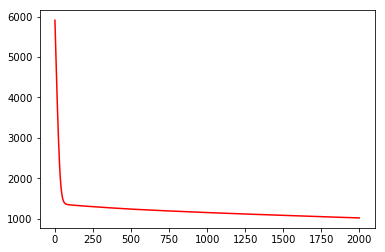

In [5]:
plt.plot(range(num_of_iteration), log['loss'], 'r')
plt.show()

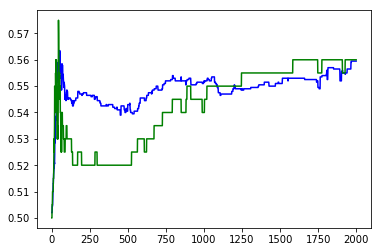

In [6]:
plt.plot(range(num_of_iteration), log['training_accuracy'], 'b',range(num_of_iteration), log['test_accuracy'], 'g')
plt.show()

In [7]:
print("test acc : {:.2%}".format(log['test_accuracy'][-1]))

test acc : 56.00%
